# Meta Methods 


In [ ]:
# Import libraries 
import numpy as np    # Numeric and matrix computation
import pandas as pd  # Optional: good package for manipulating data 
import sklearn as sk  # Package with learning algorithms implemented
%matplotlib inline
import pandas
from sklearn.model_selection import cross_val_score  
import sklearn.model_selection as cv    # Pel Cross-validation
from pandas import plotting

pandas.set_option('display.max_columns', None)
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('max_colwidth', -1)
pandas.set_option('display.precision', 3)
pandas.set_option('display.float_format', lambda x: '%.3f' % x)
# para volver a montar reinciar el entorno de ejecución
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd '/content/drive/MyDrive/MD'
df = pd.read_csv("sample_5000_con_outliers.csv")
#df=df.loc[:, df.columns!='Unnamed: 0']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  del sys.path[0]


Mounted at /content/drive
/content/drive/MyDrive/MD


In [ ]:

#df['music_genre'].replace(['Electronic', 'Anime', 'Jazz','Alternative','Country','Rap','Blues','Rock','Classical','Hip-Hop'],[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], inplace=True)
#df.corr(method='pearson')


In [ ]:
df = df.iloc[:, 1:]

df.drop('artist_name', inplace=True, axis=1)
df.drop('track_name', inplace=True, axis=1)
df.drop('key', inplace=True, axis=1)
df.drop('mode', inplace=True, axis=1)
df.drop(df.columns[[1,2,8]], axis = 1, inplace = True)
df.dtypes


popularity          float64
valence             float64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
loudness            float64
speechiness         float64
music_genre         object 
dtype: object

In [ ]:
df

,popularity,valence,acousticness,danceability,energy,instrumentalness,loudness,speechiness,music_genre
0,21.000,0.454,0.004,0.713,0.824,0.492,-7.475,0.041,Electronic
1,51.000,0.123,0.078,0.475,0.591,0.055,-7.854,0.037,Electronic
2,43.000,0.962,0.169,0.685,0.909,0.001,-7.627,0.043,Electronic
3,30.000,0.771,0.058,0.815,0.509,0.112,-12.991,0.049,Electronic
4,36.000,0.487,0.122,0.878,0.921,0.022,-5.162,0.132,Electronic
...,...,...,...,...,...,...,...,...,...
4994,58.000,0.392,0.358,0.472,0.672,0.000,-4.997,0.212,Hip-Hop
4995,47.000,0.243,0.013,0.706,0.787,0.000,-5.314,0.089,Hip-Hop
4996,58.000,0.758,0.105,0.905,0.414,0.000,-8.112,0.061,Hip-Hop
4997,59.000,0.330,0.033,0.913,0.574,0.000,-7.022,0.044,Hip-Hop


In [ ]:
y = df['music_genre'].values
X = df.values[:,0:8].astype('float32')
print(y)
print('---------------')
print(X)

['Electronic' 'Electronic' 'Electronic' ... 'Hip-Hop' 'Hip-Hop' 'Hip-Hop']
---------------
[[ 2.100e+01  4.540e-01  3.620e-03 ...  4.920e-01 -7.475e+00  4.090e-02]
 [ 5.100e+01  1.230e-01  7.760e-02 ...  5.490e-02 -7.854e+00  3.740e-02]
 [ 4.300e+01  9.620e-01  1.690e-01 ...  6.630e-04 -7.627e+00  4.300e-02]
 ...
 [ 5.800e+01  7.580e-01  1.050e-01 ...  3.660e-04 -8.112e+00  6.150e-02]
 [ 5.900e+01  3.300e-01  3.340e-02 ...  0.000e+00 -7.022e+00  4.410e-02]
 [ 6.500e+01  3.540e-01  8.310e-02 ...  0.000e+00 -5.016e+00  4.410e-02]]


In [ ]:
# No preprocessing needed. Numerical and scaled data
# Separate data from labels
#df=df.drop(df.index[[0]])
#y=df[16].values
#X=df.values[:,[0,3,4,7,8,9,10,11,12,13,14,15]]
#print(y)
#print(X)

## Voting scheme

We can combine these three algorithms *Naive Bayes, Knn, Decisicion Tree* into a voting classifier and apply it to the music genere dataset with the following steps.




In [ ]:
from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

cv=50

clf1 = GaussianNB()

params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed, Best parameters for your classifier
clf.fit(X, y) #run fit with all sets of parameters
print("Best Params fo Knn=",clf.best_params_, "Accuracy=", clf.best_score_)
parval=clf.best_params_ #Parameter setting that gave the best results on the hold out data.
clf2 = KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])

clf3 = DecisionTreeClassifier(criterion='entropy')

#loop applying wich one cl
for clf, label in zip([clf1, clf2, clf3], ['Naive Bayes','Knn (3)', 'Dec. Tree', ]):
    scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), label))
    

Best Params fo Knn= {'n_neighbors': 23, 'weights': 'distance'} Accuracy= 0.39967070707070695
Accuracy: 0.417 [Naive Bayes]
Accuracy: 0.400 [Knn (3)]
Accuracy: 0.424 [Dec. Tree]


Assign the individual classifiers to the voting ensemble. Here, we need to pass a list of tuples (estimators), where every tuple consists of the name of the classifier (a string of our choosing) and the model object. The voting scheme can be either voting='hard' or voting='soft':

hard -> every individual classifier votes for a class, and the majority wins

soft -> every individual classifier provides a probability value that a specific data point belongs to a particular target class.

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)], voting='hard')
scores = cross_val_score(eclf, X, y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean() , "Majority Voting"))


Accuracy: 0.455 [Majority Voting]


In [ ]:
clf1.fit(X,y)
clf1.score(X,y)

0.42488497699539907

In [ ]:
eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)],voting='soft', weights=[2,1,2])
scores = cross_val_score(eclf, X, y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean(), "Weighted Voting"))

Accuracy: 0.432 [Weighted Voting]


In order to convince us that 99.1% is a great accuracy score, we can compare the ensemble's performance to the theoretical performance of each individual classifier. We do this by fitting the individual classifiers to the data.  All in all, we were just able to gain a good percent in performance by combining three unrelated classifiers into an ensemble. Each of these classifiers might have made different mistakes on the training set, but that's OK because on average, we need just two out of three classifiers to be correct.


## Bagging

**Bagging**: Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions to form a final prediction.

If we wanted to implement bagging with Decision tree classifiers

In [18]:
from sklearn.ensemble import BaggingClassifier

lb=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lb.append(scores.mean())

lb2=[]    
print()
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=nest,max_features=0.35), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lb2.append(scores.mean())

Accuracy: 0.421 [1]
Accuracy: 0.398 [2]
Accuracy: 0.468 [5]
Accuracy: 0.490 [10]
Accuracy: 0.511 [20]
Accuracy: 0.521 [50]
Accuracy: 0.523 [100]
Accuracy: 0.529 [200]

Accuracy: 0.216 [1]
Accuracy: 0.209 [2]
Accuracy: 0.284 [5]
Accuracy: 0.309 [10]
Accuracy: 0.349 [20]
Accuracy: 0.399 [50]
Accuracy: 0.428 [100]
Accuracy: 0.427 [200]


## Random Forest

Random Forest, which tests all possible splits over fraction of features
Random Forest -> only use Desicion Tree, we can't select the 
base estimators

In [19]:
from sklearn.ensemble import RandomForestClassifier

lrf=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(RandomForestClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lrf.append(scores.mean())

Accuracy: 0.390 [1]
Accuracy: 0.380 [2]
Accuracy: 0.460 [5]
Accuracy: 0.490 [10]
Accuracy: 0.515 [20]
Accuracy: 0.525 [50]
Accuracy: 0.538 [100]
Accuracy: 0.542 [200]


Extra Trees classifier always tests random splits over fraction of features

In [20]:
from sklearn.ensemble import ExtraTreesClassifier

lext=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(ExtraTreesClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lext.append(scores.mean())

Accuracy: 0.352 [1]
Accuracy: 0.349 [2]
Accuracy: 0.438 [5]
Accuracy: 0.469 [10]
Accuracy: 0.503 [20]
Accuracy: 0.514 [50]
Accuracy: 0.529 [100]
Accuracy: 0.530 [200]


## Boosting

*Bagging* tries to reduce variance of base classifiers by building
different bootstrapping datasets
*   Selecting a decision stump

*   Increasing the weighting of cases that the decision stump labeled incorrectly while reducing the weighting of correctly labeled cases

Create new tree tried to focus en casos especials -> 80 yes 20 no -> create new tree to invetigate this case

In [21]:
from sklearn.ensemble import AdaBoostClassifier

lboo=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(AdaBoostClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lboo.append(scores.mean())

Accuracy: 0.197 [1]
Accuracy: 0.265 [2]
Accuracy: 0.346 [5]
Accuracy: 0.399 [10]
Accuracy: 0.439 [20]
Accuracy: 0.407 [50]
Accuracy: 0.367 [100]
Accuracy: 0.349 [200]


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

lboodt=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lboodt.append(scores.mean())

Accuracy: 0.441 [1]
Accuracy: 0.422 [2]
Accuracy: 0.400 [5]
Accuracy: 0.391 [10]
Accuracy: 0.409 [20]
Accuracy: 0.448 [50]
Accuracy: 0.460 [100]
Accuracy: 0.493 [200]


Tried to reduce lost function.


In [16]:
from sklearn.ensemble import GradientBoostingClassifier

lgbboo=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(GradientBoostingClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lgbboo.append(scores.mean())

Accuracy: 0.473 [1]
Accuracy: 0.474 [2]
Accuracy: 0.490 [5]
Accuracy: 0.513 [10]
Accuracy: 0.522 [20]
Accuracy: 0.535 [50]
Accuracy: 0.534 [100]
Accuracy: 0.527 [200]


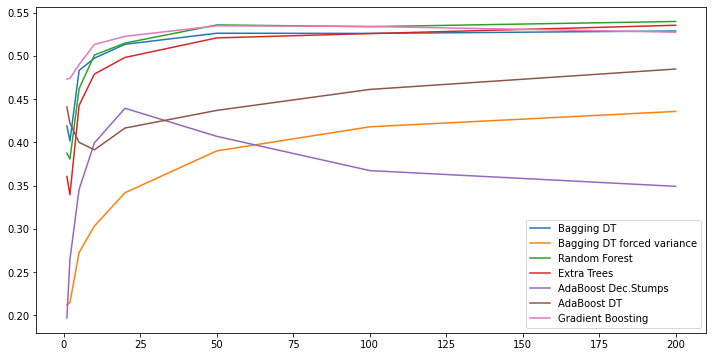

In [17]:
import  matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot([1,2,5,10,20,50,100,200],lb,label="Bagging DT")
plt.plot([1,2,5,10,20,50,100,200],lb2,label="Bagging DT forced variance")
plt.plot([1,2,5,10,20,50,100,200],lrf,label="Random Forest")
plt.plot([1,2,5,10,20,50,100,200],lext,label="Extra Trees")
plt.plot([1,2,5,10,20,50,100,200],lboo,label="AdaBoost Dec.Stumps")
plt.plot([1,2,5,10,20,50,100,200],lboodt,label="AdaBoost DT")
plt.plot([1,2,5,10,20,50,100,200],lgbboo,label="Gradient Boosting")
plt.legend(loc='lower right')

plt.show()